<a href="https://colab.research.google.com/github/Mikepa22/InsectX_classifier/blob/main/PROJECT_X_INSECTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASIFICACIÓN DE INSECTOS USANDO INSECT VILLAGE SYNTHETIC DATASET**

The dataset was programatically generated through Python and each foreground was edited through GIMP, a photo editing software. Images for the foreground (insects) and the background were all taken from pexels.com, unsplash.com, and, pixabay.com; website that offers free vector images without necessary attribution. The dataset in the folder Insect Classes contains 1000 synthetic images for each insect class

Bees _
Beetles _
Butterflies _
Cicada _
Dragonflies _
Grasshoppers _
Moths_
Scorpions _
Snails _
Spiders _

Refer to the kaggle repository: https://www.kaggle.com/datasets/vencerlanz09/insect-village-synthetic-dataset



#Carga del dataset desde kaggle

In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import os
import random
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.api._v2.keras import activations
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, models
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score
import seaborn as sns; sns.set()

In [ ]:
!pip install kaggle

In [ ]:
#Se le da permisos al archivo llave kaggle.json el cual permite acceder a los repositorios de kaggle.
!chmod 600 kaggle.json
#Se crea una carpeta solo para la llave a usar en kaggle.
!mkdir ~/.kaggle/
#Copia del archivo kaggle a la carpeta creada anteriormente
!cp kaggle.json ~/.kaggle/
!ls

kaggle.json  sample_data


In [ ]:
!kaggle datasets download -d vencerlanz09/insect-village-synthetic-dataset

 99% 433M/435M [00:24<00:00, 24.7MB/s]
100% 435M/435M [00:24<00:00, 18.7MB/s]


In [ ]:
!unzip insect-village-synthetic-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Insect Classes/Insect Classes/Grasshopper/00000000.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000001.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000002.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000003.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000004.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000005.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000006.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000007.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000008.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000009.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000010.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000011.jpg  
  inflating: Insect Classes/Insect Classes/Grasshopper/00000012.jpg  
  inflating: Insect Classes/Insect Clas

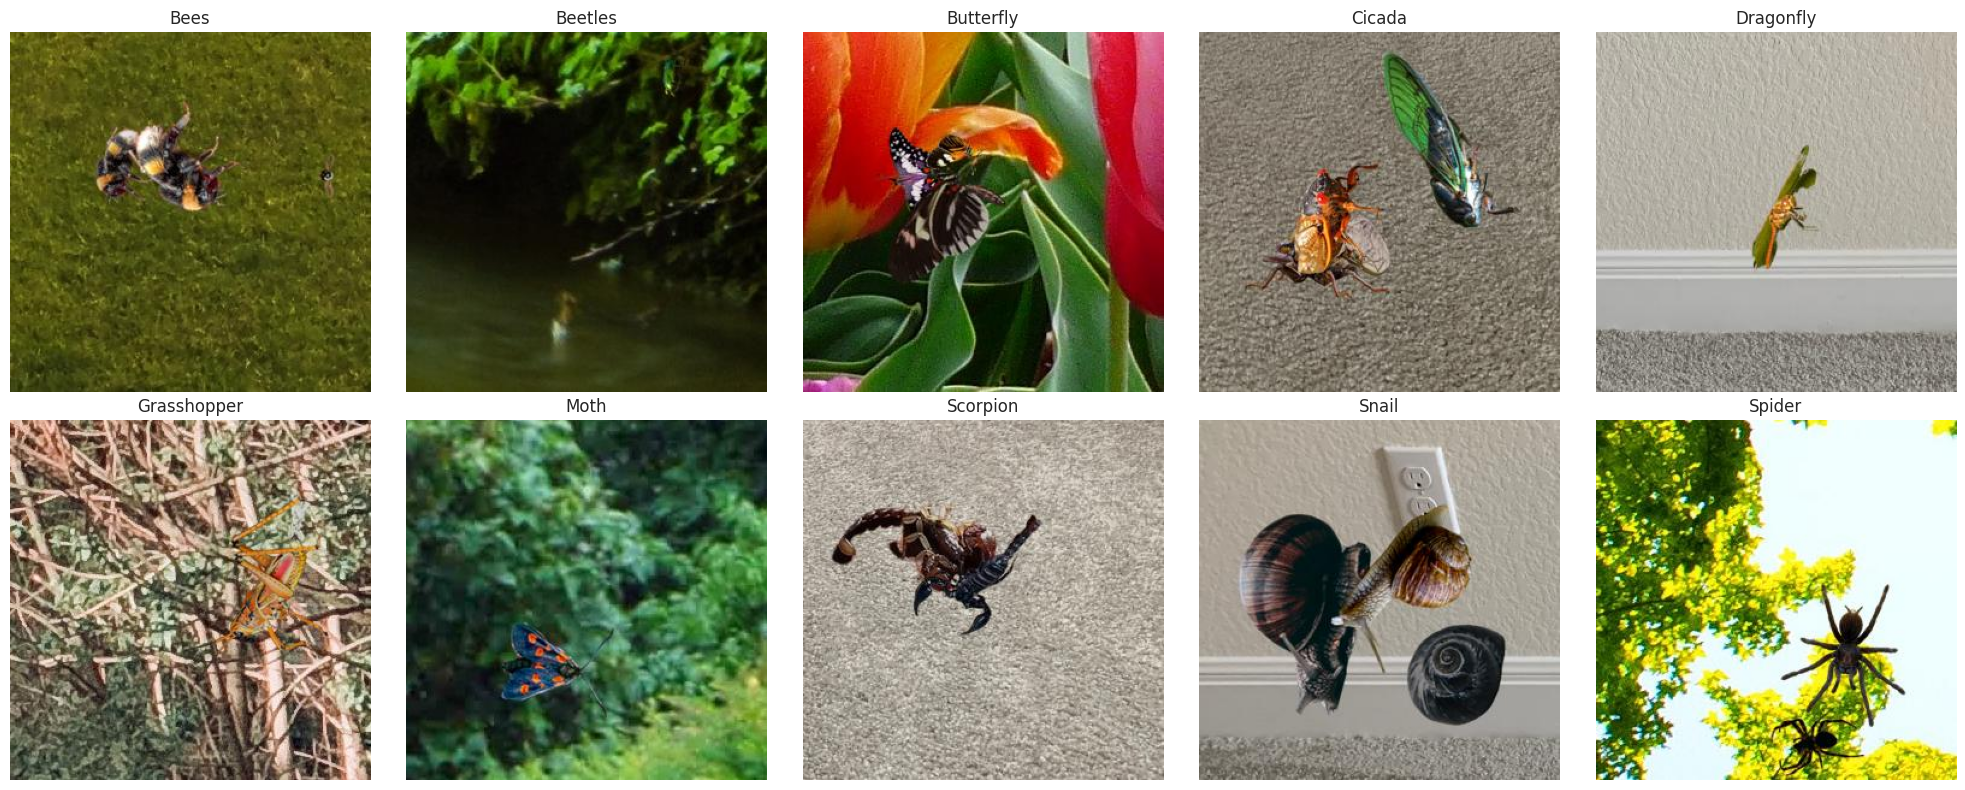

In [ ]:
import matplotlib.pyplot as plt
import os
# Define the base directory where the folders are located.
base_directory = '/content/Insect Classes/Insect Classes'
class_folders = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly',
                 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

# Iterate through the folders and plot the first image.
for i, class_name in enumerate(class_folders):
    # Build the path to the first image.
    image_path = os.path.join(base_directory, class_name, '00000001.jpg')

    image = plt.imread(image_path)

    # Plot the image.
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

# prevent overlapping.
plt.tight_layout()
plt.show()

# PREPROCESAMIENTO

In [ ]:
import os
import shutil
import pandas as pd

# Definimos el directorio base donde se encuentran las carpetas de clase
base_directory = '/content/Insect Classes/Insect Classes'
classes = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']

# Definimos el directorio donde se guardarán todas las imágenes
all_images_directory = '/content/Insect Classes/All Images'
os.makedirs(all_images_directory, exist_ok=True)

# Creamos el DataFrame para almacenar los datos de las imágenes
df = pd.DataFrame(columns=['image_id', 'class'])

# Creamos un diccionario para mapear los nombres de las clases a números
class_to_number = {class_name: i for i, class_name in enumerate(classes)}

# Variable para mantener un contador global de las imágenes
global_image_counter = 0

# Copiamos las imágenes de cada clase a la nueva carpeta y actualizamos el DataFrame
for class_index, class_name in enumerate(classes):
    class_folder = os.path.join(base_directory, class_name)
    image_files = os.listdir(class_folder)
    # Tomamos la cantidad necesaria de imágenes de cada clase
    for image_number in range(1000):
        # Construimos el nombre de archivo con el formato deseado
        new_image_name = f'{global_image_counter:08d}.jpg'
        new_image_path = os.path.join(all_images_directory, new_image_name)

        # Encontramos el archivo de imagen correspondiente
        old_image_name = f'{image_number:08d}.jpg'
        old_image_path = os.path.join(class_folder, old_image_name)

        # Copiamos el archivo al nuevo directorio
        shutil.copy2(old_image_path, new_image_path)

        # Agregamos la información al DataFrame
        df.loc[global_image_counter] = [new_image_name, class_index]

        # Incrementamos el contador global de imágenes
        global_image_counter += 1

# Guardamos el DataFrame como un archivo CSV
csv_file_path = os.path.join(all_images_directory, 'image_data.csv')
df.to_csv(csv_file_path, index=False)

# Mostrar las primeras filas del DataFrame
print(df.head(20))


        image_id  class
0   00000000.jpg      0
1   00000001.jpg      0
2   00000002.jpg      0
3   00000003.jpg      0
4   00000004.jpg      0
5   00000005.jpg      0
6   00000006.jpg      0
7   00000007.jpg      0
8   00000008.jpg      0
9   00000009.jpg      0
10  00000010.jpg      0
11  00000011.jpg      0
12  00000012.jpg      0
13  00000013.jpg      0
14  00000014.jpg      0
15  00000015.jpg      0
16  00000016.jpg      0
17  00000017.jpg      0
18  00000018.jpg      0
19  00000019.jpg      0


In [ ]:
import pandas as pd

# Definimos el tamaño de las muestras para cada conjunto
train_sample_size = 7000
val_sample_size = 2000
test_sample_size = 1000

# Aseguramos que los tamaños de las muestras sean múltiplos del número de clases para mantener el balance
num_classes = 10  # Asumiendo que hay 10 clases
assert train_sample_size % num_classes == 0, "El tamaño de la muestra de entrenamiento debe ser múltiplo del número de clases."
assert val_sample_size % num_classes == 0, "El tamaño de la muestra de validación debe ser múltiplo del número de clases."
assert test_sample_size % num_classes == 0, "El tamaño de la muestra de prueba debe ser múltiplo del número de clases."

# Calcular el número de muestras por clase para cada conjunto
samples_per_class_train = train_sample_size // num_classes
samples_per_class_val = val_sample_size // num_classes
samples_per_class_test = test_sample_size // num_classes

# Crear DataFrames vacíos para cada conjunto
df_train = pd.DataFrame(columns=['image_id', 'class'])
df_val = pd.DataFrame(columns=['image_id', 'class'])
df_test = pd.DataFrame(columns=['image_id', 'class'])

# Función para dividir el dataframe en conjuntos balanceados
def create_balanced_sets(df, samples_per_class, df_target):
    for i in range(num_classes):
        class_df = df[df['class'] == i].sample(n=samples_per_class, random_state=42)
        df_target = pd.concat([df_target, class_df])
    return df_target

# Crear los conjuntos balanceados
df_train = create_balanced_sets(df, samples_per_class_train, df_train)
df_val = create_balanced_sets(df, samples_per_class_val, df_val)
df_test = create_balanced_sets(df, samples_per_class_test, df_test)

# Asegurarnos de que los conjuntos no se superpongan
remaining_indices = set(df.index) - set(df_train.index) - set(df_val.index) - set(df_test.index)
df_remaining = df.loc[remaining_indices]

# Si aún quedan imágenes después de crear los conjuntos, se pueden agregar al conjunto de entrenamiento (opcional)
"""extra_samples_per_class = len(df_remaining) // num_classes
if extra_samples_per_class > 0:
    df_train = create_balanced_sets(df_remaining, extra_samples_per_class, df_train)"""

# Mezclar los DataFrames
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_val = df_val.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación del tamaño de cada conjunto
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

# Verificación de la distribución de clases en el conjunto de entrenamiento
print(df_train['class'].value_counts())

# No podemos guardar los archivos CSV en este entorno, pero te mostraré cómo hacerlo:
# df_train.to_csv('/content/Insect Classes/train_data.csv', index=False)
# df_val.to_csv('/content/Insect Classes/val_data.csv', index=False)
# df_test.to_csv('/content/Insect Classes/test_data.csv', index=False)

# Mostrar las primeras filas del DataFrame de entrenamiento
df_train.head()


Training set size: 7000
Validation set size: 2000
Test set size: 1000
9    700
4    700
2    700
0    700
6    700
8    700
7    700
3    700
1    700
5    700
Name: class, dtype: int64


<ipython-input-8-26df81afc528>:38: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_remaining = df.loc[remaining_indices]


image_id class
0  00009029.jpg     9
1  00004893.jpg     4
2  00002016.jpg     2
3  00000266.jpg     0
4  00006643.jpg     6

In [ ]:
df_val.tail(20)

image_id class
1980  00000599.jpg     0
1981  00008714.jpg     8
1982  00004493.jpg     4
1983  00005260.jpg     5
1984  00006332.jpg     6
1985  00000714.jpg     0
1986  00007275.jpg     7
1987  00001599.jpg     1
1988  00006901.jpg     6
1989  00002662.jpg     2
1990  00000425.jpg     0
1991  00008901.jpg     8
1992  00005299.jpg     5
1993  00008237.jpg     8
1994  00005436.jpg     5
1995  00005599.jpg     5
1996  00006787.jpg     6
1997  00004296.jpg     4
1998  00007820.jpg     7
1999  00005583.jpg     5

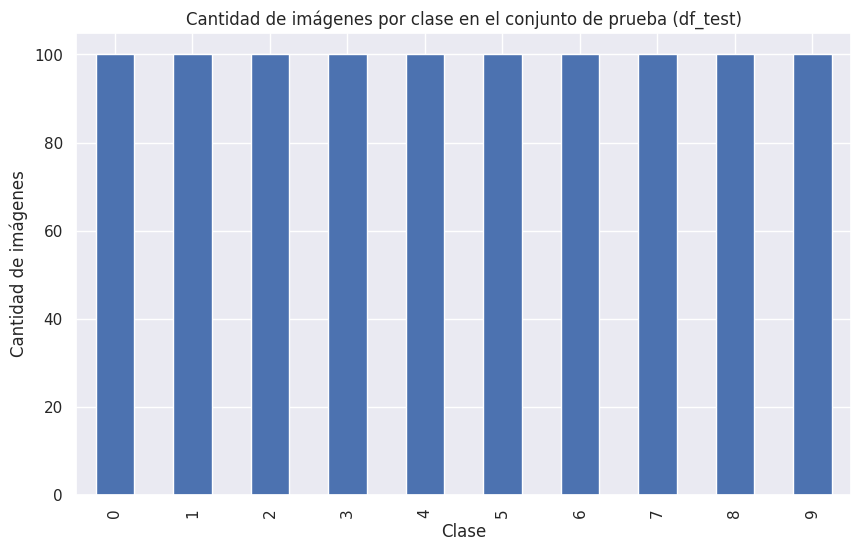

In [ ]:
#Creacion de un grafico de barras para verificar que los datasets estan balanceados
class_counts = df_test['class'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Cantidad de imágenes por clase en el conjunto de prueba (df_test)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de imágenes')
plt.xticks(range(10), range(10))  # Etiquetas del eje x con clases de 0 a 9
plt.show()

#GENERADORES DE IMAGENES

In [ ]:
#Convertimos a str ya que asi lo requiere el generador

df_train['class'] = df_train['class'].astype(str)
df_val['class'] = df_val['class'].astype(str)
df_test['class'] = df_test['class'].astype(str)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador de imágenes con la normalización de los datos
datagen = ImageDataGenerator(rescale=1./255)  # Normalización de los datos (píxeles de 0 a 1)

# Crear generadores de datos para entrenamiento, validación y pruebas
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='/content/Insect Classes/All Images',  # Ajustar a la ruta donde se encuentran tus imágenes
    x_col='image_id',          # Columna con los nombres de las imágenes
    y_col='class',             # Columna con las etiquetas de clase
    class_mode='categorical',  # Clasificación multiclase
    target_size=(299, 299),    # Tamaño para VGG16
    batch_size=32              # 32 imágenes por batch
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory='/content/Insect Classes/All Images',
    x_col='image_id',
    y_col='class',
    class_mode='categorical',
    target_size=(299, 299),
    batch_size=32
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='/content/Insect Classes/All Images',
    x_col='image_id',
    y_col='class',
    class_mode='categorical',
    target_size=(299, 299),
    batch_size=32
)


Found 7000 validated image filenames belonging to 10 classes.
Found 2000 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.


# VGG 16

VGG16 es una arquitectura de red neuronal fundamental, creada por Karen Simonyan y Andrew Zisserman de la Universidad de Oxford en 2014. Destacó en la competencia ILSVRC (Desafío de Reconocimiento Visual a Gran Escala de ImageNet) por su simplicidad y profundidad, características claves para su rendimiento en tareas de reconocimiento de imágenes. Se caracteriza por su uso uniforme de capas convolucionales 3x3 y capas de agrupamiento máximo para reducir la dimensionalidad espacial. Consta de 13 capas convolucionales y 3 capas totalmente conectadas, sumando un total de 16 capas con pesos aprendibles, y utiliza funciones de activación ReLU para capturar patrones complejos.

Una ventaja principal de VGG16 es su capacidad para detectar características abstractas en distintos niveles, lo que lo hace ideal para la clasificación detallada, como identificar diferentes especies de insectos. A pesar de su estructura relativamente simple, VGG16 tiene más de 138 millones de parámetros, lo que lo hace grande y complejo para entrenar

En esta sección se intento entrenar la red con la arquitectura vgg16 from scratch. Los resultados no fueron buenos. Se concluye que para entrenar desde cero un red neuronal, sobre todo si se va a realizar una clasificación multiclase se requiere sobretodo una mayor cantidad de imagenes y potencia computacional

In [ ]:

#Red neuronal VGG16

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth Convolutional Block
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())

model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))  # Dropout
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))  # Aumentando dropout para la segunda capa densa

# Output Layer
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'vgg16_bestmodel.h5',  # The path where to save the model
    monitor='val_accuracy',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    #save_weights_only=True,   # Solo pesos
    mode='max',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max', restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 8
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/8
218/218 [==============================] - ETA: 0s - loss: 5.2731 - accuracy: 0.0960
Epoch 1: val_accuracy improved from -inf to 0.09980, saving model to vgg16_bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


218/218 [==============================] - 165s 614ms/step - loss: 5.2731 - accuracy: 0.0960 - val_loss: 2.5872 - val_accuracy: 0.0998
Epoch 2/8
218/218 [==============================] - ETA: 0s - loss: 2.3821 - accuracy: 0.0951
Epoch 2: val_accuracy improved from 0.09980 to 0.10081, saving model to vgg16_bestmodel.h5
218/218 [==============================] - 118s 540ms/step - loss: 2.3821 - accuracy: 0.0951 - val_loss: 2.3096 - val_accuracy: 0.1008
Epoch 3/8
218/218 [==============================] - ETA: 0s - loss: 2.3043 - accuracy: 0.0863
Epoch 3: val_accuracy did not improve from 0.10081
218/218 [==============================] - 107s 492ms/step - loss: 2.3043 - accuracy: 0.0863 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 4/8
218/218 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0896Restoring model weights from the end of the best epoch: 2.

Epoch 4: val_accuracy did not improve from 0.10081
218/218 [==============================] - 108s 495ms/step

#VGG 16 TRANSFER LEARNING 85%

 El Transfer Learning consiste en tomar un modelo entrenado previamente en una tarea amplia y general, como es el caso de VGG16 entrenado en el dataset ImageNet, y adaptarlo para resolver una tarea específica con un dominio de datos diferente o más reducido. En nuestro caso, este dominio específico comprende la clasificación de 10 clases distintas de insectos.

El uso de Transfer Learning ofrece varias ventajas significativas sobre el entrenamiento de una red neuronal convolucional (CNN) desde cero, especialmente cuando se trabaja con conjuntos de datos de tamaño limitado.

- Reducción significativa en el tiempo de entrenamiento
- Necesidad de menos datos
- Mejora en el rendimiento del modelo

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Cargar el modelo VGG16 sin las capas densas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Agregar capas personalizadas para la clasificación binaria
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x= Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
#x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
#x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Combinar el modelo base de VGG16 con las capas personalizadas
model_pre = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_pre.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 20

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'vgg16_bestmodel3.h5',  # The path where to save the model
    monitor='val_accuracy',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    #save_weights_only=True,   # Solo pesos
    mode='max',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max', restore_best_weights=True)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history_pre = model_pre.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint]
    )

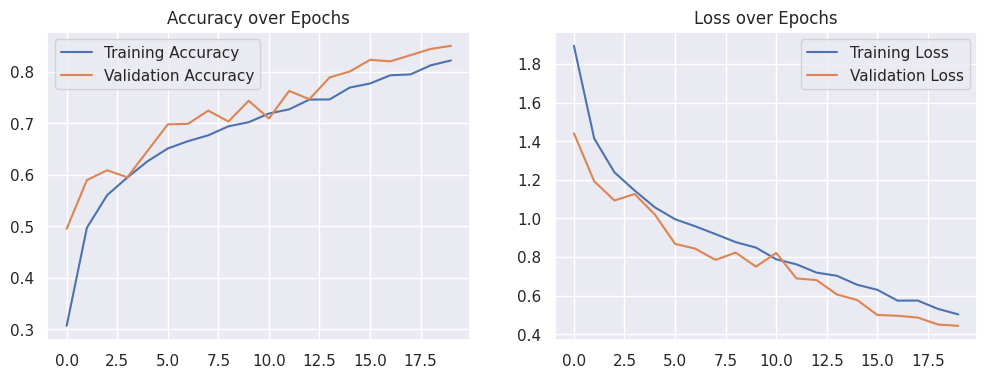

In [ ]:
#Prueba que me arrojo el 85% en validation data, 3 capas densas 1024, 512 y 256, mismo resultado que usando solo dos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_pre.history['accuracy'], label='Training Accuracy')
plt.plot(history_pre.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_pre.history['loss'], label='Training Loss')
plt.plot(history_pre.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

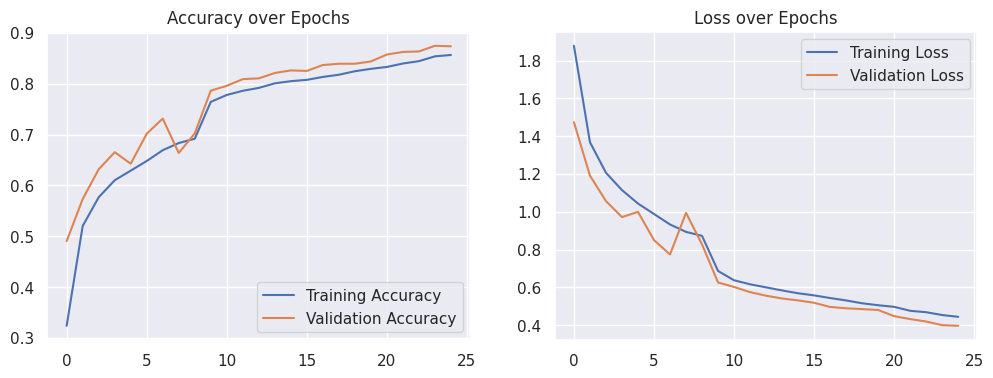

In [ ]:
#Prueba que me arrojo el 85% en validation data, 3 capas densas 1024, 512 y 256, mismo resultado que usando solo dos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_do.history['accuracy'], label='Training Accuracy')
plt.plot(history_do.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_do.history['loss'], label='Training Loss')
plt.plot(history_do.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

#VGG 16 TRANSFER LEARNING +92%

Buscando aumentar el performance del modelo entrenado con vgg16 se experimento con el numero de capas densas y cantidad de neuronas. Tambien se hizo uso de learning rate ajustable con el callback de keras ReduceLROnPlateau

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers import Dropout

# Cargar el modelo VGG16 sin las capas densas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Agregar capas personalizadas para la clasificación binaria
x = base_model.output
x = GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
#x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
#x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Combinar el modelo base de VGG16 con las capas personalizadas
model_do = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_do.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 30
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'vgg16_bestmodel6.h5',  # The path where to save the model
    monitor='val_accuracy',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    #save_weights_only=True,   # Solo pesos
    mode='max',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Métrica a ser observada
                              factor=0.1,         # Factor por el cual la tasa de aprendizaje se reducirá. new_lr = lr * factor
                              patience=3,        # Número de épocas sin mejora después de las cuales la tasa de aprendizaje se reducirá
                              min_lr=0.00001,     # Límite inferior de la tasa de aprendizaje
                              verbose=1)


#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history_do = model_do.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint,reduce_lr]
    )

Epoch 1/30
218/218 [==============================] - ETA: 0s - loss: 0.4283 - accuracy: 0.8598
Epoch 1: val_accuracy improved from -inf to 0.88105, saving model to vgg16_bestmodel6.h5
218/218 [==============================] - 41s 188ms/step - loss: 0.4283 - accuracy: 0.8598 - val_loss: 0.3817 - val_accuracy: 0.8810 - lr: 1.0000e-04
Epoch 2/30
218/218 [==============================] - ETA: 0s - loss: 0.4184 - accuracy: 0.8647
Epoch 2: val_accuracy improved from 0.88105 to 0.88659, saving model to vgg16_bestmodel6.h5
218/218 [==============================] - 42s 193ms/step - loss: 0.4184 - accuracy: 0.8647 - val_loss: 0.3746 - val_accuracy: 0.8866 - lr: 1.0000e-04
Epoch 3/30
218/218 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.8695
Epoch 3: val_accuracy did not improve from 0.88659
218/218 [==============================] - 40s 185ms/step - loss: 0.4028 - accuracy: 0.8695 - val_loss: 0.3648 - val_accuracy: 0.8836 - lr: 1.0000e-04
Epoch 4/30
218/218 [=======

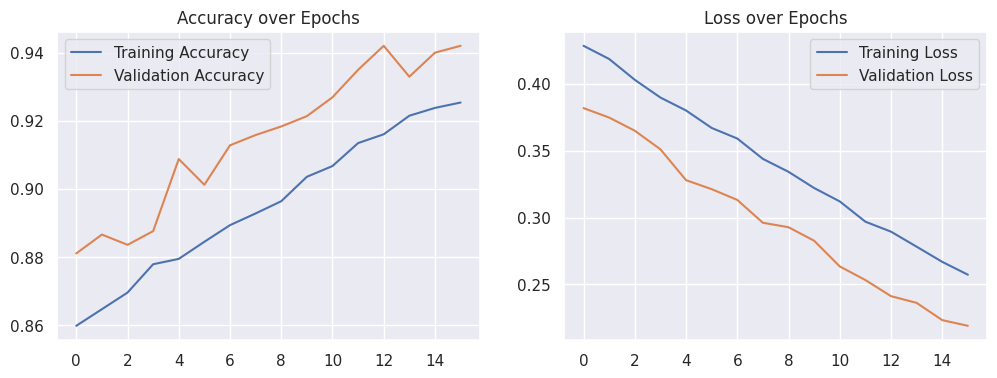

In [ ]:
#Prueba que me arrojo el 85% en validation data, 3 capas densas 1024, 512 y 256, mismo resultado que usando solo dos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_do.history['accuracy'], label='Training Accuracy')
plt.plot(history_do.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_do.history['loss'], label='Training Loss')
plt.plot(history_do.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

<ipython-input-21-0f738e6d57d8>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 [==============================] - 3s 3s/step


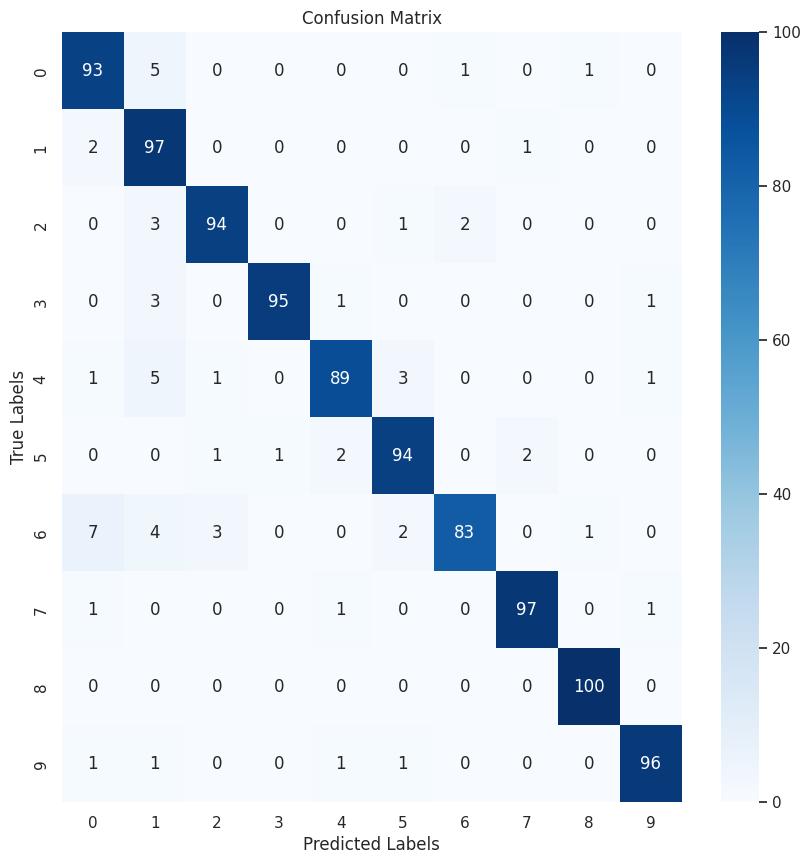

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.82      0.97      0.89       100
           2       0.95      0.94      0.94       100
           3       0.99      0.95      0.97       100
           4       0.95      0.89      0.92       100
           5       0.93      0.94      0.94       100
           6       0.97      0.83      0.89       100
           7       0.97      0.97      0.97       100
           8       0.98      1.00      0.99       100
           9       0.97      0.96      0.96       100

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reinicia el generador de prueba
test_generator.reset()

# Inicializa las listas para las predicciones y las etiquetas reales
predictions = []
true_labels = []

# Obtiene el número de pasos (batches) para recorrer todo el conjunto de pruebas
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

# Recorre el generador y recopila las predicciones y las etiquetas reales
for _ in range(test_steps_per_epoch):
    x_test, y_test = next(test_generator)
    pred = model_do.predict(x_test)
    predictions.extend(np.argmax(pred, axis=1))
    true_labels.extend(np.argmax(y_test, axis=1))

# Calcula la matriz de confusión
cm = confusion_matrix(true_labels, predictions)

# Crea un mapa de calor para la matriz de confusión
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Genera y muestra un reporte de clasificación
class_labels = list(test_generator.class_indices.keys())  # Obtiene las etiquetas de las clases
report = classification_report(true_labels, predictions, target_names=class_labels)
print(report)


#Inception


Inception V3 es una avanzada red neuronal de Google que mejora la clasificación de imágenes con eficiencia computacional. Introduce convoluciones asimétricas, reduciendo los cálculos necesarios sin perder capacidad de análisis. Con técnicas como el abandono de etiquetas para evitar el sobreajuste, y operaciones de agrupamiento para mantener relevancia de características, Inception V3 equilibra precisión y eficiencia. Con más de 23 millones de parámetros, ofrece alto rendimiento en visión por computadora, especialmente útil para aprendizaje por transferencia en conjuntos de datos amplios como ImageNet, facilitando resultados impresionantes con menor esfuerzo de entrenamiento.

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar InceptionV3 preentrenado, sin las capas finales
base_model = InceptionV3(weights='imagenet', include_top=False,  input_shape=(299, 299, 3))

# Añadir una nueva capa de pooling global al final del modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Añadir una capa densa totalmente conectada
x = Dense(1024, activation='relu')(x)
#x= Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
# Añadir la capa de salida para la clasificación
predictions = Dense(10, activation='softmax')(x)

# Este es el modelo que entrenaremos
model_in = Model(inputs=base_model.input, outputs=predictions)

#inicialmente se congelan las capas, seria en el primer entrenamiento
for layer in base_model.layers:
    layer.trainable = False

#luego se hacen entrenables las capas superiores, en este caso las ultimas 2 para mejorar generalizacion
for layer in base_model.layers[-2:]:
    if layer.name in ['mixed9_1','mixed10']:
        layer.trainable = True

#Primer training usar lr=0.001, en etapa de fine tuning disminuir a lr=0.0001
model_in.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Para obervar la arquitectura de InceptionV3
base_model.summary()

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
epochs = 10

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'inmodel_best5.h5',  # The path where to save the model
    monitor='val_accuracy',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    #save_weights_only=True,   # Solo pesos
    mode='max',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Métrica a ser observada
                              factor=0.1,         # Factor por el cual la tasa de aprendizaje se reducirá. new_lr = lr * factor
                              patience=2,        # Número de épocas sin mejora después de las cuales la tasa de aprendizaje se reducirá
                              min_lr=0.00001,     # Límite inferior de la tasa de aprendizaje
                              verbose=1)

#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history_in = model_in.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint,reduce_lr]
    )

Epoch 1/10
218/218 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9726
Epoch 1: val_accuracy improved from -inf to 0.97480, saving model to inmodel_best5.h5
218/218 [==============================] - 48s 218ms/step - loss: 0.1163 - accuracy: 0.9726 - val_loss: 0.1027 - val_accuracy: 0.9748 - lr: 1.0000e-04
Epoch 2/10
218/218 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9770
Epoch 2: val_accuracy improved from 0.97480 to 0.97732, saving model to inmodel_best5.h5
218/218 [==============================] - 43s 197ms/step - loss: 0.0992 - accuracy: 0.9770 - val_loss: 0.0894 - val_accuracy: 0.9773 - lr: 1.0000e-04
Epoch 3/10
218/218 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9879
Epoch 3: val_accuracy improved from 0.97732 to 0.97833, saving model to inmodel_best5.h5
218/218 [==============================] - 42s 192ms/step - loss: 0.0716 - accuracy: 0.9879 - val_loss: 0.0827 - val_accuracy: 0.9783 - lr: 1.0000

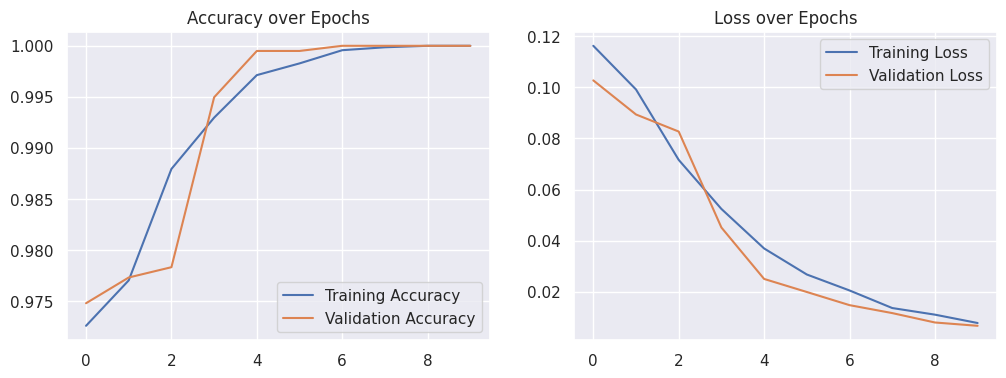

In [ ]:
# Destino final
#loss: 0.0205 - accuracy: 0.9996 - val_loss: 0.0148 - val_accuracy: 1.0000 - lr: 1.0000e-04
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_in.history['accuracy'], label='Training Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_in.history['loss'], label='Training Loss')
plt.plot(history_in.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

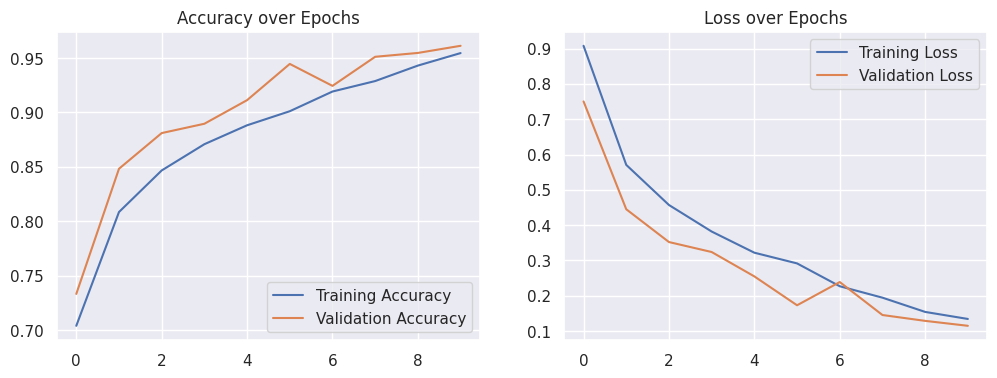

In [ ]:
# el runtime se desconnecto y no se pudo guardar el modelo anterior, asi que se volvio a entrenar, guardado en inmodel_best4.h5
# - loss: 0.1342 - accuracy: 0.9545 - val_loss: 0.1148 - val_accuracy: 0.9612 - lr: 0.0010
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_in.history['accuracy'], label='Training Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_in.history['loss'], label='Training Loss')
plt.plot(history_in.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

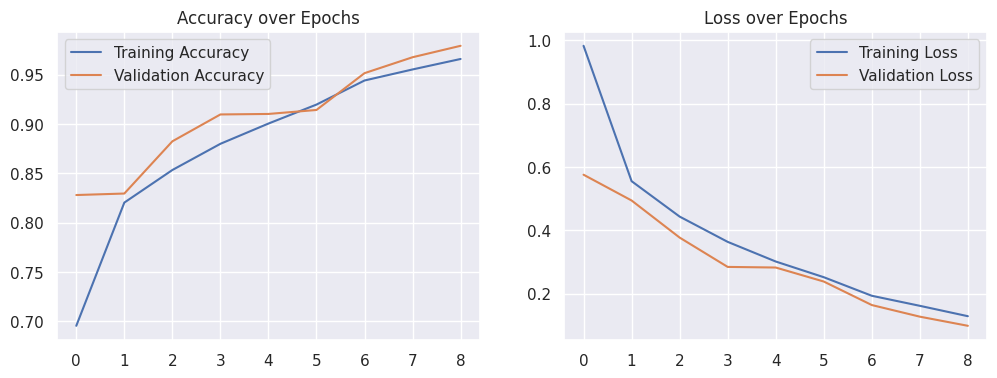

In [ ]:
# Se realizo un ajuste fino descongelando las capas superiores del modelo inception v3 mixed 10 y mixed9_1
# Se redujo la tasa de entrenamiento a 0.0001 para el ajuste fin
# loss: 0.1287 - accuracy: 0.9660 - val_loss: 0.0984 - val_accuracy: 0.9793 - lr: 1.0000e-04

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_in.history['accuracy'], label='Training Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_in.history['loss'], label='Training Loss')
plt.plot(history_in.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

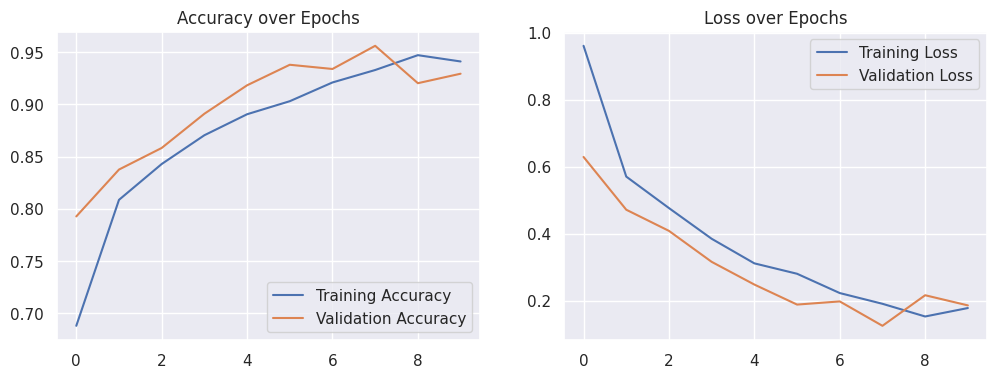

In [ ]:
#Se ajusto el tamaño de imagen a 299x299. 1 capa densa de 1021 y otra de 512. inmodel_best2
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_in.history['accuracy'], label='Training Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_in.history['loss'], label='Training Loss')
plt.plot(history_in.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

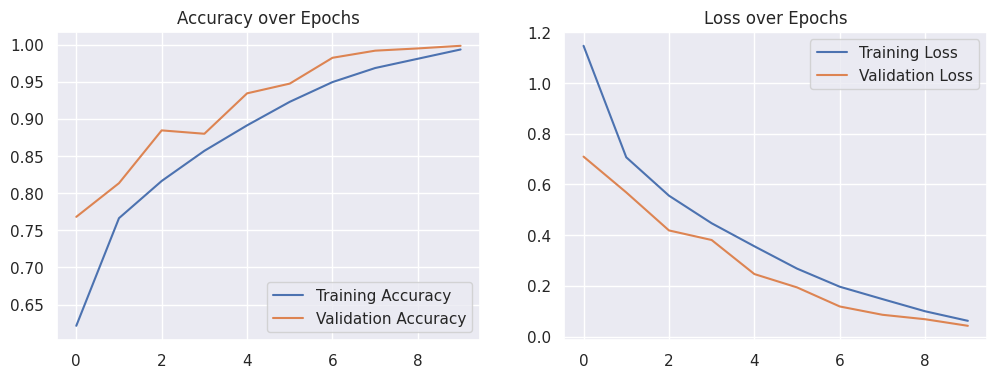

In [ ]:
#Entrenamiento inicial, se alimento al modelo con un tamaño de imagen inadecuado. Dos capas densas de 1024 cada una
#Modelo que no generaliza bien
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_in.history['accuracy'], label='Training Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_in.history['loss'], label='Training Loss')
plt.plot(history_in.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

<ipython-input-30-7e1d5c646f66>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 [==============================] - 0s 65ms/step


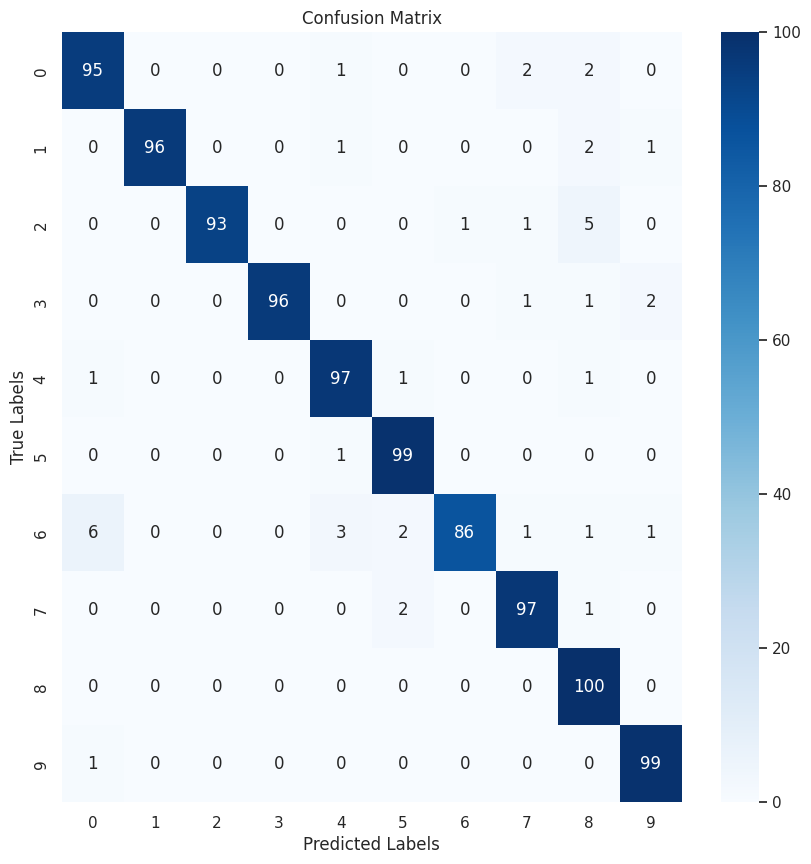

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       1.00      0.96      0.98       100
           2       1.00      0.93      0.96       100
           3       1.00      0.96      0.98       100
           4       0.94      0.97      0.96       100
           5       0.95      0.99      0.97       100
           6       0.99      0.86      0.92       100
           7       0.95      0.97      0.96       100
           8       0.88      1.00      0.94       100
           9       0.96      0.99      0.98       100

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reinicia el generador de prueba
test_generator.reset()

# Inicializa las listas para las predicciones y las etiquetas reales
predictions = []
true_labels = []

# Obtiene el número de pasos (batches) para recorrer todo el conjunto de pruebas
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

# Recorre el generador y recopila las predicciones y las etiquetas reales
for _ in range(test_steps_per_epoch):
    x_test, y_test = next(test_generator)
    pred = model_in.predict(x_test)
    predictions.extend(np.argmax(pred, axis=1))
    true_labels.extend(np.argmax(y_test, axis=1))

# Calcula la matriz de confusión
cm = confusion_matrix(true_labels, predictions)

# Crea un mapa de calor para la matriz de confusión
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Genera y muestra un reporte de clasificación
class_labels = list(test_generator.class_indices.keys())  # Obtiene las etiquetas de las clases
report = classification_report(true_labels, predictions, target_names=class_labels)
print(report)


#Predicciones INCEPTION V3

In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from keras.models import load_model
img_path = '/content/grillo.png'
img = image.load_img(img_path, target_size=(224, 224))  # Tamaño esperado por InceptionV3
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Hacer la predicción
predictions = model_in.predict(img_array)

# Decodificar la predicción
predicted_class = np.argmax(predictions, axis=1)
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predicted_class_name = class_labels[predicted_class[0]]

print(f"La imagen es clasificada como: {predicted_class_name}")

1/1 [==============================] - 0s 27ms/step
La imagen es clasificada como: Cicada


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

def predict_image_class(model, img_path, class_labels, top=5):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(299, 299)) # cambiar a 300 par INV3 y 224 para vgg16
    plt.imshow(img)
    plt.axis('off')
    plt.grid(False)
    plt.title("Input Image")
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the top N class probabilities
    top_indices = predictions[0].argsort()[-top:][::-1]
    top_probabilities = predictions[0][top_indices]
    top_labels = [class_labels[i] for i in top_indices]

    # Return the top N class labels and their probabilities
    return {label: prob for label, prob in zip(top_labels, top_probabilities)}


In [ ]:
from keras.models import load_model
model_in=load_model("/content/inmodel_best4.h5")

##Modelo incorrecto

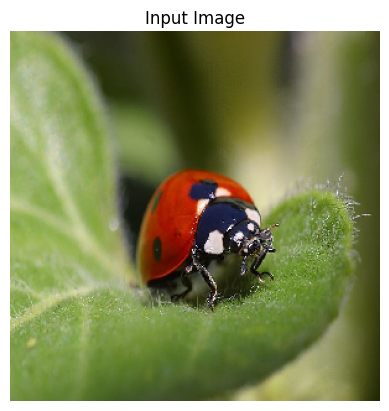

1/1 [==============================] - 0s 26ms/step
{'Beetles': 0.7292749, 'Butterfly': 0.13912582, 'Scorpion': 0.041559577, 'Bees': 0.0284365, 'Spider': 0.023700058}


In [ ]:
img_path = '/content/Ladybug.jpg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_in, img_path, class_labels)
print(predictions)

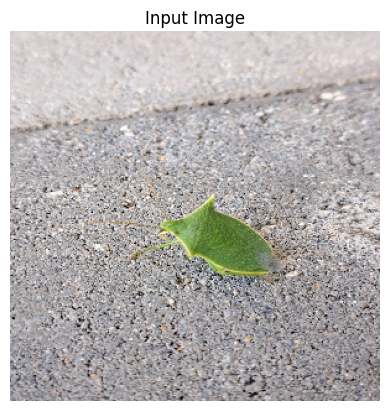

1/1 [==============================] - 0s 34ms/step
{'Butterfly': 0.38686848, 'Moth': 0.26140603, 'Beetles': 0.15776251, 'Grasshopper': 0.06945581, 'Cicada': 0.060957585}


In [ ]:
img_path = '/content/insectoreal.jpeg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_in, img_path, class_labels)
print(predictions)

##Modelo correcto

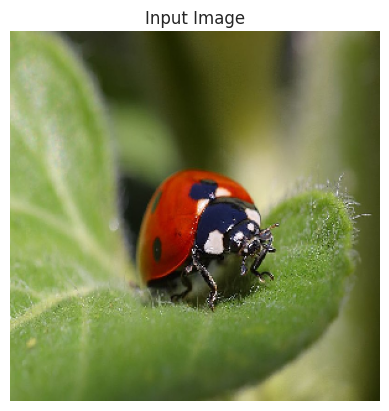

1/1 [==============================] - 0s 38ms/step
{'Butterfly': 0.5392513, 'Beetles': 0.31022495, 'Bees': 0.074627966, 'Moth': 0.04025994, 'Spider': 0.012504238}


In [ ]:
img_path = '/content/Ladybug.jpg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_in, img_path, class_labels)
print(predictions)

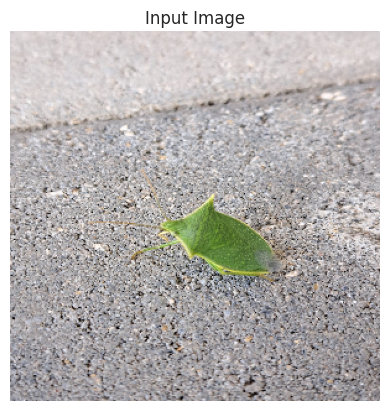

1/1 [==============================] - 0s 35ms/step
{'Dragonfly': 0.66243446, 'Beetles': 0.21902187, 'Grasshopper': 0.05769657, 'Bees': 0.035760626, 'Spider': 0.013335034}


In [ ]:
img_path = '/content/insectoreal.jpeg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_in, img_path, class_labels)
print(predictions)

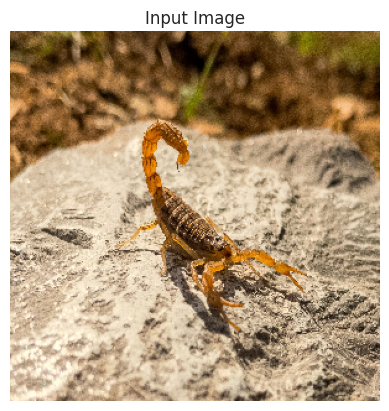

1/1 [==============================] - 0s 34ms/step
{'Scorpion': 1.0, 'Cicada': 1.9619522e-09, 'Beetles': 7.0117595e-10, 'Spider': 5.3126276e-10, 'Bees': 4.594518e-12}


In [ ]:
img_path = '/content/scorpio.jpg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_in, img_path, class_labels)
print(predictions)

#Predicciones VGG16

In [ ]:
from keras.models import load_model
model_vgg=load_model("/content/vgg16_bestmodel6.h5")

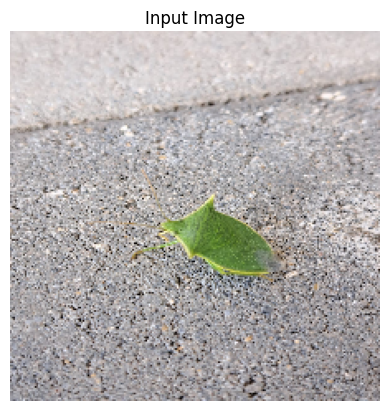

1/1 [==============================] - 1s 1s/step
{'Cicada': 0.5339948, 'Beetles': 0.44364777, 'Butterfly': 0.014400174, 'Moth': 0.007926069, 'Grasshopper': 2.1366113e-05}


In [ ]:
img_path = '/content/insectoreal.jpeg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_vgg, img_path, class_labels)
print(predictions)

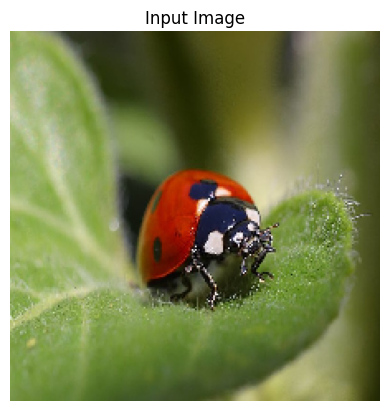

1/1 [==============================] - 0s 19ms/step
{'Beetles': 1.0, 'Scorpion': 8.0493323e-10, 'Cicada': 2.82751e-11, 'Spider': 2.4396053e-11, 'Butterfly': 6.7315706e-12}


In [ ]:
img_path = '/content/Ladybug.jpg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class(model_vgg, img_path, class_labels)
print(predictions)

# Prediccion JSON

In [ ]:
import json
def predict_image_class2(model, img_path, class_labels, top=5):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=(299, 299))
    plt.imshow(img)
    plt.axis('off')
    plt.grid(False)
    plt.title("Input Image")
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)

    top_indices = predictions[0].argsort()[-top:][::-1]
    top_probabilities = predictions[0][top_indices]
    top_labels = [class_labels[i] for i in top_indices]

    # Convertir las probabilidades a porcentaje
    top_probabilities_percentage = ['{:.2f}%'.format(prob * 100) for prob in top_probabilities]

    # Crear el diccionario con las etiquetas y sus probabilidades en formato de porcentaje
    results = {label: prob for label, prob in zip(top_labels, top_probabilities_percentage)}

    # Convertir el diccionario a JSON
    results_json = json.dumps(results)

    # Retorna la variable que almacena el JSON
    return results_json

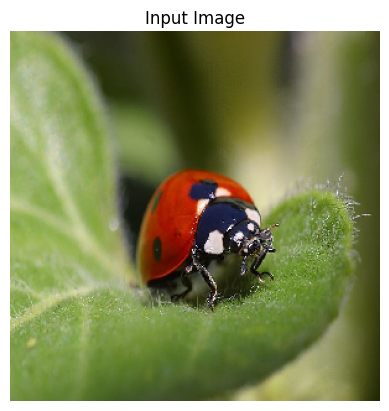

1/1 [==============================] - 0s 246ms/step
{"Beetles": "72.93%", "Butterfly": "13.91%", "Scorpion": "4.16%", "Bees": "2.84%", "Spider": "2.37%"}


In [ ]:
img_path = '/content/Ladybug.jpg'
class_labels = ['Bees', 'Beetles', 'Butterfly', 'Cicada', 'Dragonfly', 'Grasshopper', 'Moth', 'Scorpion', 'Snail', 'Spider']
predictions = predict_image_class2(model_in, img_path, class_labels)
print(predictions)

# RESNET 50

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

# Cargar el modelo ResNet50 sin las capas superiores
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Agregar capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convertir las características en un único vector por imagen
x = Dense(1024, activation='relu')(x)
#x = Dropout(0.5)(x)  # Agregar dropout para regularización
x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)  # Otra capa de dropout para regularización

# Añade una capa final para clasificación multiclase con 10 clases
predictions = Dense(10, activation='softmax')(x)

# Este es el modelo que vamos a entrenar
model_res = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas de ResNet50 para entrenar solo las capas superiores inicialmente
for layer in base_model.layers:
    layer.trainable = False

# Compilación del modelo
model_res.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
epochs = 30

#checkpoint para guardar mejores pesos
checkpoint = ModelCheckpoint(
    'remodel_best.h5',  # The path where to save the model
    monitor='val_accuracy',       # Metrica
    verbose=1,
    save_best_only=True,      # Solo guarda si `val_loss` mejora
    #save_weights_only=True,   # Solo pesos
    mode='max',               # Minimizar
    save_freq='epoch'         # Comprobar metrica cada epoca
)

#Early stopping que parara training si val_loss no mejora luego de 2 epocas
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history_res = model_res.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping,checkpoint]
    )

Epoch 1/30
218/218 [==============================] - ETA: 0s - loss: 2.3269 - accuracy: 0.1165
Epoch 1: val_accuracy improved from -inf to 0.12651, saving model to remodel_best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


218/218 [==============================] - 45s 170ms/step - loss: 2.3269 - accuracy: 0.1165 - val_loss: 2.3040 - val_accuracy: 0.1265
Epoch 2/30
218/218 [==============================] - ETA: 0s - loss: 2.2894 - accuracy: 0.1216
Epoch 2: val_accuracy improved from 0.12651 to 0.13458, saving model to remodel_best.h5
218/218 [==============================] - 31s 142ms/step - loss: 2.2894 - accuracy: 0.1216 - val_loss: 2.2822 - val_accuracy: 0.1346
Epoch 3/30
218/218 [==============================] - ETA: 0s - loss: 2.2794 - accuracy: 0.1327
Epoch 3: val_accuracy did not improve from 0.13458
218/218 [==============================] - 32s 146ms/step - loss: 2.2794 - accuracy: 0.1327 - val_loss: 2.2904 - val_accuracy: 0.1280
Epoch 4/30
218/218 [==============================] - ETA: 0s - loss: 2.2762 - accuracy: 0.1373
Epoch 4: val_accuracy improved from 0.13458 to 0.14667, saving model to remodel_best.h5
218/218 [==============================] - 32s 145ms/step - loss: 2.2762 - accuracy